# Cluster membership probability

# The data frames are created from the create_data_for.. file

Lindegren et al needs to be done

In [1]:
from astropy.io import fits
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import seaborn as sn
import pickle
if("Analysis" in os.getcwd()):
    os.chdir("../")

from Data_handling.pca_functions import Pca_Fitting
from Data_handling.gaia_query import gaia_cone, bailer_jones_cone, concatenate_gaia_bailer
from Data_handling.vae import Encoder,Decoder, VAE , loss_function, model_train


os.chdir("Analysis")
os.getcwd()

'/Users/mattocallaghan/GES/Analysis'

In [2]:
sn.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)         

# Astrometric solution

# 1.2 Cluster choice

Here choosing open cluster Trumpler 14


Inputting a sample of data in the open cluster region.

# 1.5 Import Data From CSV

In [3]:
os.chdir('../cluster_files')

In [4]:
gaia_eso=pd.read_csv('gaia_eso.csv')
gaia_not_eso=pd.read_csv('gaia_not_eso.csv')

In [5]:
os.chdir('../Analysis')

We create two dataframes, one with all of the GAIA ESO values and another which comes from GAIA only.

# 1.6.1 Global corections

Remove G>18
What about the parallax zero point?

https://arxiv.org/pdf/2108.02783.pdf

We use the recommendations from 294 Lindegren et al. (2018) to account for systematics found 295 within the parallax and proper-motion data. In par- 296 ticular, we subtract the -0.029 mas parallax zero-point 297 from all of our stars and exclude all stars fainter than 298 18th Gaia G magnitude.

In [6]:
gaia_not_eso=gaia_not_eso[gaia_not_eso['phot_g_mean_mag']<=18.0]
gaia_eso=gaia_eso[gaia_eso['phot_g_mean_mag']<=18.0]

In [7]:
gaia_not_eso

,Unnamed: 0,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,RA_ICRS,DE_ICRS,rgeo,b_rgeo,B_rgeo,rpgeo,b_rpgeo,B_rpgeo,Flag,GAIA_eDR3_ID
0,0,1636042515805110273,Gaia EDR3 4252441450420820352,4252441450420820352,702956645,2016.0,282.788193,0.090897,-6.547213,0.089533,...,282.788193,-6.547213,3248.09937,2437.19043,4425.95654,2855.32617,2315.71069,3623.02954,10033,4252441450420820352
1,1,1636042515805110273,Gaia EDR3 4252441450420820480,4252441450420820480,520045408,2016.0,282.786902,0.223747,-6.548131,0.222232,...,282.786902,-6.548131,4038.64795,2439.56250,5918.26416,3988.03687,2681.29272,5453.57666,10033,4252441450420820480
10,10,1636042515805110273,Gaia EDR3 4252441454747974144,4252441454747974144,1755347729,2016.0,282.788041,0.100512,-6.544398,0.098044,...,282.788041,-6.544398,7029.94971,5015.07324,9462.53711,5386.83398,3975.99561,7709.98975,10033,4252441454747974144
15,15,1636042515805110273,Gaia EDR3 4252441454819788672,4252441454819788672,1451265992,2016.0,282.790473,0.087144,-6.547268,0.085542,...,282.790473,-6.547268,4639.32910,3500.85815,6313.65674,3612.06616,2917.94946,4607.43994,10033,4252441454819788672
17,17,1636042515805110273,Gaia EDR3 4252441454819796224,4252441454819796224,828877519,2016.0,282.789817,0.051438,-6.545433,0.052550,...,282.789817,-6.545433,7679.53369,6060.19385,10201.36820,8016.15967,5487.08008,10478.49220,10033,4252441454819796224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128511,129557,1636042515805110273,Gaia EDR3 4254024236147403648,4254024236147403648,223319491,2016.0,282.788470,0.082114,-6.007469,0.090750,...,282.788470,-6.007469,7084.01074,4910.56494,9565.59473,6045.83057,4184.62695,8731.06445,10033,4254024236147403648
128513,129559,1636042515805110273,Gaia EDR3 4254024236147411840,4254024236147411840,104821037,2016.0,282.780248,0.057465,-6.007047,0.059235,...,282.780248,-6.007047,2100.93555,1883.03979,2459.72168,2147.17578,1872.23279,2423.75122,10033,4254024236147411840
128519,129565,1636042515805110273,Gaia EDR3 4254024304866894336,4254024304866894336,40902801,2016.0,282.775456,0.071895,-6.005157,0.070749,...,282.775456,-6.005157,7769.46533,5965.04639,11243.42680,10565.55080,5788.68164,16626.45700,10133,4254024304866894336
128521,129567,1636042515805110273,Gaia EDR3 4254024781525585920,4254024781525585920,1276606975,2016.0,282.703295,0.090482,-6.011748,0.091330,...,282.703295,-6.011748,4963.53955,3545.60669,6594.21533,3321.26025,2547.17358,4331.92773,10033,4254024781525585920


# 1.6.2 Proper motion cuts

When making cuts we are going to assume that the GAIA ESO is a 'good' sample and use its values to define the bounds.

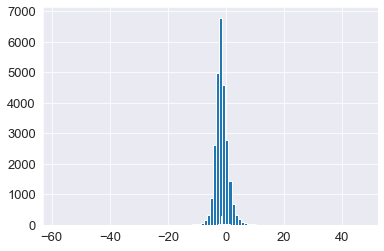

In [8]:
plt.hist(gaia_not_eso['pmra'],bins=100)
plt.hist(gaia_eso['pmra'],bins=100)
plt.show()

 Make a 3 sigma clip on proper motion

In [9]:
bound=[gaia_eso['pm'].median()-3*gaia_eso['pm'].std(),gaia_eso['pm'].median()+3*gaia_eso['pm'].std()]

In [10]:
truth1=gaia_not_eso['pm']>=bound[0]
truth2=gaia_not_eso['pm']<=bound[1]
gaia_not_eso=gaia_not_eso[truth1]
gaia_not_eso=gaia_not_eso[truth2]
len(gaia_not_eso)

25145

In [11]:
truth1=gaia_eso['pm']>=bound[0]
truth2=gaia_eso['pm']<=bound[1]
gaia_eso=gaia_eso[truth1]
gaia_eso=gaia_eso[truth2]
len(gaia_eso)

984

# 1.6 Make a parallax cut 

Make a parallax cut by taking the mean and standard deviation of the parallax from the Gaia eso sample and clip by 3 sigma.

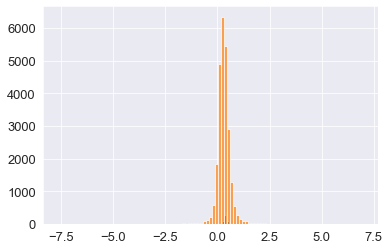

In [12]:
plt.hist(gaia_eso['parallax'],bins=100)
plt.hist(gaia_not_eso['parallax'],bins=100,alpha=0.7)
plt.show()

In [13]:
np.std(gaia_eso['parallax'])

0.36496830616464826

In [14]:
bound=[gaia_eso['parallax'].median()-3*gaia_eso['parallax'].std(),gaia_eso['parallax'].median()+3*gaia_eso['parallax'].std()]

In [15]:
truth1=gaia_not_eso['parallax']>=bound[0]
truth2=gaia_not_eso['parallax']<=bound[1]
gaia_not_eso=gaia_not_eso[truth1]
gaia_not_eso=gaia_not_eso[truth2]
len(gaia_not_eso)

/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/3676889474.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gaia_not_eso=gaia_not_eso[truth2]


24808

In [16]:
truth1=gaia_eso['parallax']>=bound[0]
truth2=gaia_eso['parallax']<=bound[1]
gaia_eso=gaia_eso[truth1]
gaia_eso=gaia_eso[truth2]
len(gaia_eso)

/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/2039189.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gaia_eso=gaia_eso[truth2]


974

In [17]:
gaia_not_eso['parallax'].min()

-0.6881985653324588

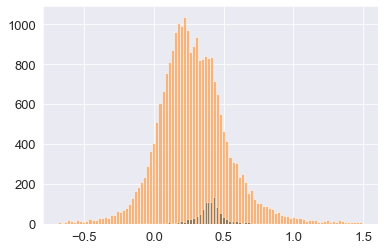

In [18]:

plt.hist(gaia_eso['parallax'],bins=90)
plt.hist(gaia_not_eso['parallax'],bins=100,alpha=0.5)
plt.show()

Even after the parallax cut of 3 sigma there are still plenty of sources.

After making a very conservative cut we are going to attempt to fit the BNN with error.

# 1.7 Making Data into Learning Format.

In [19]:
columns_parameters=['ra','dec','parallax','VRAD','pmra','pmdec']



(array([  5.,   4.,   8.,  29., 267., 572.,  58.,  18.,   5.,   8.]),
 array([-0.67486935, -0.46616237, -0.25745539, -0.04874841,  0.15995857,
         0.36866555,  0.57737252,  0.7860795 ,  0.99478648,  1.20349346,
         1.41220044]),
 <BarContainer object of 10 artists>)

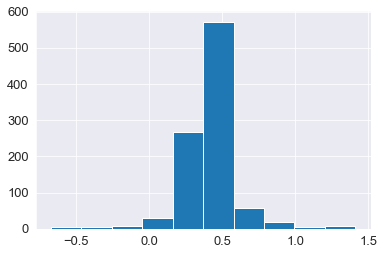

In [20]:
plt.hist((gaia_eso['parallax'].astype(float)))

The radial velocity of >300 is so massively diferent can I assume to cut it out?

In [21]:
gaia_eso=gaia_eso[gaia_eso.replace('nan',0.0).fillna(0.0)['VRAD'].astype(float)<=300]



In [22]:

data=pd.concat([gaia_eso, gaia_not_eso])
input_cluster_data=data[columns_parameters]
input_cluster_data


,ra,dec,parallax,VRAD,pmra,pmdec
0,282.565031,-6.258065,0.558562,30.64,0.776237,-6.756839
1,282.583418,-6.192254,0.376980,105.47,-1.612175,-4.640347
3,282.592885,-6.329504,0.375033,39.07,-2.393408,-4.043109
4,282.596724,-6.241452,0.523459,-43.21,-3.040533,-0.931751
5,282.596739,-6.257442,0.395225,-5.76,-0.711199,-4.404408
...,...,...,...,...,...,...
128511,282.788470,-6.007469,0.030766,NaN,-2.850967,-5.665195
128513,282.780248,-6.007047,0.449862,NaN,1.577184,3.119071
128519,282.775456,-6.005157,0.002803,NaN,-1.806624,-4.939151
128521,282.703295,-6.011748,0.209325,NaN,-3.147602,-4.699169


In [23]:
columns_error=['ra_error','dec_error','parallax_error','E_VRAD','pmra_error','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr']
error_input=pd.concat([gaia_eso, gaia_not_eso])[columns_error]

# Covariance Error matrix

In [24]:


s = np.array([[ [ None for y in range( 6 ) ] for x in range( 6 ) ] for z in range(len(error_input))])


s[:,0,0]=error_input['ra_error'].to_numpy()**2
s[:,0,1]=np.multiply(np.multiply(error_input['ra_dec_corr'].to_numpy(),error_input['ra_error'].to_numpy()),error_input['dec_error'].to_numpy())
s[:,0,2]=np.multiply(np.multiply(error_input['ra_parallax_corr'].to_numpy(),error_input['ra_error'].to_numpy()),error_input['parallax_error'].to_numpy())
s[:,0,3]=0.0
s[:,0,4]=np.multiply(np.multiply(error_input['ra_pmra_corr'].to_numpy(),error_input['ra_error'].to_numpy()),error_input['pmra_error'].to_numpy())
s[:,0,5]=np.multiply(np.multiply(error_input['ra_pmdec_corr'].to_numpy(),error_input['ra_error'].to_numpy()),error_input['pmdec_error'].to_numpy())



s[:,1,1]=error_input['dec_error'].to_numpy()**2
s[:,1,0]=s[:,0,1]
s[:,1,2]=np.multiply(np.multiply(error_input['dec_parallax_corr'].to_numpy(),error_input['dec_error'].to_numpy()),error_input['parallax_error'].to_numpy())
s[:,1,3]=0.0
s[:,1,4]=np.multiply(np.multiply(error_input['dec_pmra_corr'].to_numpy(),error_input['dec_error'].to_numpy()),error_input['pmra_error'].to_numpy())
s[:,1,5]=np.multiply(np.multiply(error_input['dec_pmdec_corr'].to_numpy(),error_input['dec_error'].to_numpy()),error_input['pmdec_error'].to_numpy())




s[:,2,0]=s[:,0,2]
s[:,2,1]=s[:,1,2]
s[:,2,2]=error_input['parallax_error'].to_numpy()**2
s[:,2,3]=0.0
s[:,2,4]=np.multiply(np.multiply(error_input['parallax_pmra_corr'].to_numpy(),error_input['parallax_error'].to_numpy()),error_input['pmra_error'].to_numpy())
s[:,2,5]=np.multiply(np.multiply(error_input['parallax_pmdec_corr'].to_numpy(),error_input['parallax_error'].to_numpy()),error_input['pmdec_error'].to_numpy())


s[:,3,0]=0.0
s[:,3,1]=0.0
s[:,3,2]=0.0
s[:,3,3]=error_input['E_VRAD'].astype(float).to_numpy()**2 
s[:,3,4]=0.0
s[:,3,5]=0.0


s[:,4,0]=s[:,0,4]
s[:,4,1]=s[:,1,4]
s[:,4,2]=s[:,2,4]
s[:,4,3]=s[:,3,4]
s[:,4,4]=error_input['pmra_error'].to_numpy()**2
s[:,4,5]=np.multiply(np.multiply(error_input['pmra_pmdec_corr'].to_numpy(),error_input['pmra_error'].to_numpy()),error_input['pmdec_error'].to_numpy())



s[:,5,0]=s[:,0,5]
s[:,5,1]=s[:,1,5]
s[:,5,2]=s[:,2,5]
s[:,5,3]=s[:,3,5]
s[:,5,4]=s[:,4,5]
s[:,5,5]=error_input['pmdec_error'].to_numpy()**2


# Mixing Matrix R 

This follows the paper linked later. The matrix R I use is a diagonal matrix with 1 in the nth position if we have a data reading for the nth feature, and zero otherwise.

For the moment we don't need it to be very complex as we are going to only have two different cases, i.e whether or not a value has radial velocity. 

In [25]:
mixing_prep=(input_cluster_data.astype(str).to_numpy()!='nan').astype(int)


In [26]:


R = [] #mixing matrix
for i in range(0,len(mixing_prep)):
    R.append(np.diag(mixing_prep[i]))

R=np.array(R)

# Definitions of the learning inputs

In [27]:
learning_input=input_cluster_data.replace('nan',0.0).fillna(0.0).to_numpy().astype(float)
learning_error_covariance=np.nan_to_num(s.astype(float),nan=0.0001) #this is so not to get singular matrix
learning_R=R


# 2.0 Cluster Membership Probability.

https://arxiv.org/pdf/0905.2979v2.pdf
Extreme Deconvolution GMM

In this section I'm following the above paper which adapts the GMM to noisy and missing data. I only apply this to the Gaia eso data at first, and using astrometric data.

Using Bayes Law:
$$ P(C | D)= P(D|C)P(C)\over{P(D)}$$
Let $\textbf{w}_{i}$ be the vector of observed data, and $\textbf{x}_i$ be the vector of 'true' values. Let $R$ be the matrix which projects $\textbf{x}_i$ to $\textbf{w}_i$ and let $S_i$ be a known covariance matrix, so that we assume $$\textbf{w}_i=R_i\textbf{x}_i + \text{noise}$$ where the noise is drawn from a Gaussian distribution with mean 0 and covariance $S_i$

Letting $\theta=(\alpha_j,\mu_j,V_j)$ be the parameters for a Gaussian mixture model. Following the paper above we can show that the likelihood of $\textbf{w}_i$ in terms of $\theta$ is the Gaussian mixture model: $$p(\textbf{w}_i|\theta)=\sum_j \alpha_j N(\textbf{w}_i|R_i\mu_j,T_{ij})$$
where $$T_{ij}=R_iV_jR_i^t+S_i$$

In [28]:
os.getcwd()
os.chdir('../')
from Density_estimation.xdeconv import XDGMM
os.chdir('Analysis')

In [29]:
%load_ext autoreload
%autoreload 2

# We are only using the Data which is in Gaia Eso and some of the Gaia data now as we have a few bugs to fix.

We fit as per the above paper and use their E-M update algorithm. GMM returns the maximum likelihood values for the gaussian mixture parameters.

One part uses all the GES data and other uses both Gaia eso and gaia.

In [30]:
gmm_GES=XDGMM(2).fit(learning_input[0:len(gaia_eso)],Xerr=learning_error_covariance[0:len(gaia_eso)],R=R[0:len(gaia_eso)])

gmm_full=XDGMM(3).fit(learning_input,Xerr=learning_error_covariance,R=R)

gmm
endgmm
gmm
endgmm


# Evaluating the Joint Probability $P(z,\textbf{w}_i)$

Let $z \in \{0,...,k\}$ be the random variable of deciding the probability of belonging to a component of the Gaussian Mixture.   
We have $$p(z,\textbf{w}_k|\theta)=p(z)p(\textbf{w}_k|z,\theta)$$
We can then find the posterior density function for $z$: $$p(z=i|\textbf{w}_k,\theta)={p(z=i|\theta)p(\textbf{w}_k|z=i,\theta)\over \sum_j p(z=j|\theta)p(\textbf{w}_k|z=j,\theta)}$$


The prior is $p(z=i|\theta)=\alpha_i$. This is the posterior probability that an observation has been generated from the $i^{th}$ component

Just Using Gaia ESO Data

In [55]:

prob_ges=gmm_GES.prob_z_given_w(learning_input[0:len(gaia_eso)],Xerr=learning_error_covariance[0:len(gaia_eso)],R=R[0:len(gaia_eso)])

Plotting

In [58]:
df=pd.DataFrame(learning_input[0:len(gaia_eso)],columns=columns_parameters)
df2=pd.DataFrame(prob_ges[:,1][0:len(gaia_eso)],columns=['prob'])
plot_df_ges=pd.concat([df,df2],axis=1)
plot_df_ges

,ra,dec,parallax,VRAD,pmra,pmdec,prob
0,282.565031,-6.258065,0.558562,30.64,0.776237,-6.756839,3.250294e-106
1,282.583418,-6.192254,0.376980,105.47,-1.612175,-4.640347,1.165767e-117
2,282.592885,-6.329504,0.375033,39.07,-2.393408,-4.043109,3.803249e-05
3,282.596724,-6.241452,0.523459,-43.21,-3.040533,-0.931751,0.000000e+00
4,282.596739,-6.257442,0.395225,-5.76,-0.711199,-4.404408,5.544679e-60
...,...,...,...,...,...,...,...
969,282.925362,-6.313343,0.681330,32.77,-1.763939,-4.189295,9.927731e-01
970,282.933178,-6.248270,0.518017,18.74,1.297329,2.485403,0.000000e+00
971,282.937478,-6.275078,0.424426,35.36,-1.555129,-4.222299,9.994009e-01
972,282.944467,-6.279355,0.291889,1.69,-1.445338,-2.678426,1.269411e-54


In [33]:
sum(plot_df_ges[0:len(gaia_eso)]['prob']>=0.99)

468

Just training and evaluating on the original sample gives 400 members with probability >=0.99

We not plot these values vs their membership.

# GAIA ESO Train and evaluate.

<AxesSubplot:xlabel='pmdec', ylabel='VRAD'>

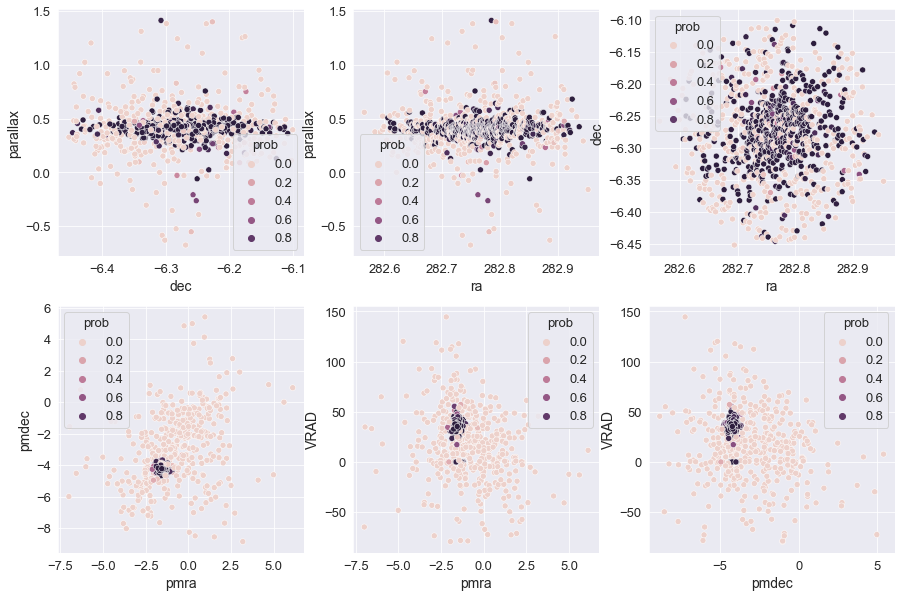

In [59]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(15)
fig.set_figheight(10)
sn.scatterplot(data=plot_df_ges,x='dec',y='parallax',hue='prob',ax=axs[0,0])
sn.scatterplot(data=plot_df_ges,x='ra',y='parallax',hue='prob',ax=axs[0,1])
sn.scatterplot(data=plot_df_ges,x='ra',y='dec',hue='prob',ax=axs[0,2])

sn.scatterplot(data=plot_df_ges,x='pmra',y='pmdec',hue='prob',ax=axs[1,0])
sn.scatterplot(data=plot_df_ges,x='pmra',y='VRAD',hue='prob',ax=axs[1,1])
sn.scatterplot(data=plot_df_ges,x='pmdec',y='VRAD',hue='prob',ax=axs[1,2])

# GAIA ESO and GAIA Train and evaluate.

This is a 3 compoennt GMM

In [35]:

prob_full=gmm_full.prob_z_given_w(learning_input,Xerr=learning_error_covariance,R=R)
df=pd.DataFrame(learning_input,columns=columns_parameters)
df2=pd.DataFrame(prob_full[:,1],columns=['prob'])
plot_df_full=pd.concat([df,df2],axis=1)
plot_df_full


,ra,dec,parallax,VRAD,pmra,pmdec,prob
0,282.565031,-6.258065,0.558562,30.64,0.776237,-6.756839,2.272232e-105
1,282.583418,-6.192254,0.376980,105.47,-1.612175,-4.640347,1.560951e-97
2,282.592885,-6.329504,0.375033,39.07,-2.393408,-4.043109,6.492006e-05
3,282.596724,-6.241452,0.523459,-43.21,-3.040533,-0.931751,1.407040e-289
4,282.596739,-6.257442,0.395225,-5.76,-0.711199,-4.404408,5.012303e-49
...,...,...,...,...,...,...,...
25777,282.788470,-6.007469,0.030766,0.00,-2.850967,-5.665195,1.672779e-29
25778,282.780248,-6.007047,0.449862,0.00,1.577184,3.119071,0.000000e+00
25779,282.775456,-6.005157,0.002803,0.00,-1.806624,-4.939151,3.309349e-07
25780,282.703295,-6.011748,0.209325,0.00,-3.147602,-4.699169,2.134537e-18


In [36]:
sum(plot_df_full[0:len(gaia_eso)]['prob']>=0.99)

435

Now there are only 300 objects in the original GES sample which are identified as being part of the cluster, this is verified by the following plots.

GAIA ESO AND GAIA

<AxesSubplot:title={'center':'hello'}, xlabel='pmdec', ylabel='VRAD'>

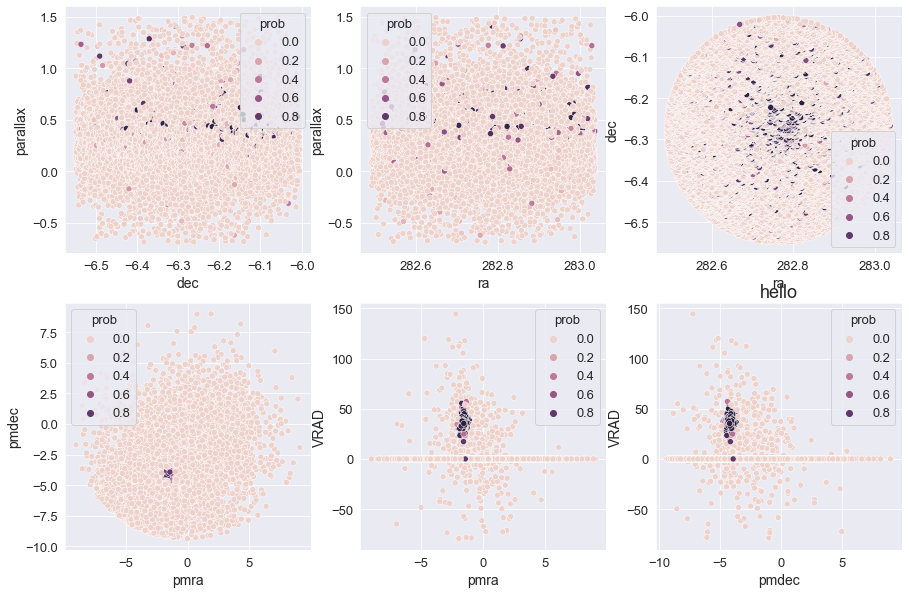

In [37]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.title('hello')
sn.scatterplot(data=plot_df_full,x='dec',y='parallax',hue='prob',ax=axs[0,0])
sn.scatterplot(data=plot_df_full,x='ra',y='parallax',hue='prob',ax=axs[0,1])
sn.scatterplot(data=plot_df_full,x='ra',y='dec',hue='prob',ax=axs[0,2])

sn.scatterplot(data=plot_df_full,x='pmra',y='pmdec',hue='prob',ax=axs[1,0])
sn.scatterplot(data=plot_df_full,x='pmra',y='VRAD',hue='prob',ax=axs[1,1])
sn.scatterplot(data=plot_df_full,x='pmdec',y='VRAD',hue='prob',ax=axs[1,2])


# 2.2 Train on Gaia ESO and evaluate on GAIA plus GAIA ESO

We now see what happens if we train on a 'good' sample, that being the GAIA ESO and then apply to a much larger data set, with also less information attached to it.

In [60]:

comp=gmm_GES.prob_z_given_w(learning_input,Xerr=learning_error_covariance,R=R)
df=pd.DataFrame(learning_input,columns=columns_parameters)
df2=pd.DataFrame(comp[:,1],columns=['prob'])
plot_df=pd.concat([df,df2],axis=1)
plot_df

,ra,dec,parallax,VRAD,pmra,pmdec,prob
0,282.565031,-6.258065,0.558562,30.64,0.776237,-6.756839,3.250294e-106
1,282.583418,-6.192254,0.376980,105.47,-1.612175,-4.640347,1.165767e-117
2,282.592885,-6.329504,0.375033,39.07,-2.393408,-4.043109,3.803249e-05
3,282.596724,-6.241452,0.523459,-43.21,-3.040533,-0.931751,0.000000e+00
4,282.596739,-6.257442,0.395225,-5.76,-0.711199,-4.404408,5.544679e-60
...,...,...,...,...,...,...,...
25777,282.788470,-6.007469,0.030766,0.00,-2.850967,-5.665195,9.054865e-27
25778,282.780248,-6.007047,0.449862,0.00,1.577184,3.119071,0.000000e+00
25779,282.775456,-6.005157,0.002803,0.00,-1.806624,-4.939151,3.647593e-04
25780,282.703295,-6.011748,0.209325,0.00,-3.147602,-4.699169,2.251774e-16


In [39]:
sum(plot_df[0:len(gaia_eso)]['prob']>=0.99)

468

As we expect this gives us the same number of members >=0.99 probability from the Gaia_eso sample

Now we see this evaluated on our full dataset.

<AxesSubplot:xlabel='pmdec', ylabel='VRAD'>

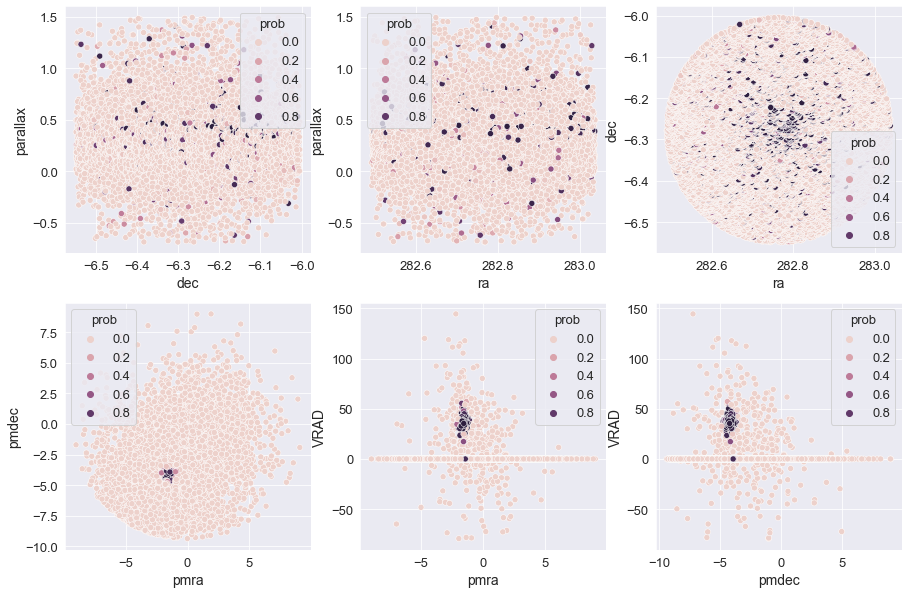

In [61]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(15)
fig.set_figheight(10)
sn.scatterplot(data=plot_df,x='dec',y='parallax',hue='prob',ax=axs[0,0])
sn.scatterplot(data=plot_df,x='ra',y='parallax',hue='prob',ax=axs[0,1])
sn.scatterplot(data=plot_df,x='ra',y='dec',hue='prob',ax=axs[0,2])

sn.scatterplot(data=plot_df,x='pmra',y='pmdec',hue='prob',ax=axs[1,0])
sn.scatterplot(data=plot_df,x='pmra',y='VRAD',hue='prob',ax=axs[1,1])
sn.scatterplot(data=plot_df,x='pmdec',y='VRAD',hue='prob',ax=axs[1,2])

Now we evaluate it only on the GAIA data

<AxesSubplot:xlabel='pmdec', ylabel='VRAD'>

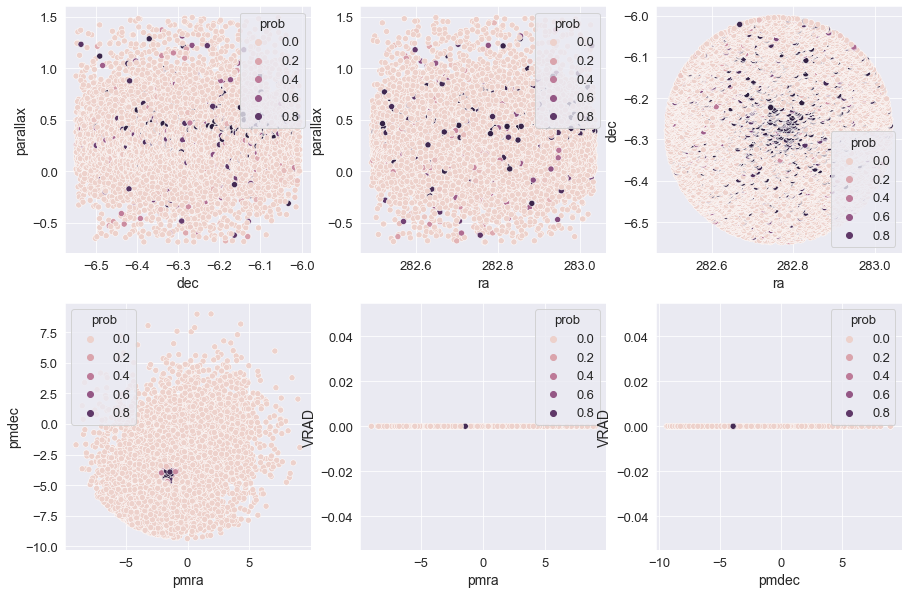

In [62]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(15)
fig.set_figheight(10)
sn.scatterplot(data=plot_df[len(gaia_eso):],x='dec',y='parallax',hue='prob',ax=axs[0,0])
sn.scatterplot(data=plot_df[len(gaia_eso):],x='ra',y='parallax',hue='prob',ax=axs[0,1])
sn.scatterplot(data=plot_df[len(gaia_eso):],x='ra',y='dec',hue='prob',ax=axs[0,2])

sn.scatterplot(data=plot_df[len(gaia_eso):],x='pmra',y='pmdec',hue='prob',ax=axs[1,0])
sn.scatterplot(data=plot_df[len(gaia_eso):],x='pmra',y='VRAD',hue='prob',ax=axs[1,1])
sn.scatterplot(data=plot_df[len(gaia_eso):],x='pmdec',y='VRAD',hue='prob',ax=axs[1,2])

# Colour Magnitude Diagrams

https://www.aanda.org/articles/aa/pdf/2018/08/aa32843-18.pdf

In [63]:
df_diagram=pd.concat([plot_df.reset_index(),data[['bp_rp','phot_g_mean_mag','bp_g','g_rp','rgeo']].reset_index()],axis=1)
df_diagram_full=pd.concat([plot_df_full.reset_index(),data[['bp_rp','phot_g_mean_mag','bp_g','g_rp','rgeo']].reset_index()],axis=1)

In [78]:
len(df_diagram[df_diagram['prob']>=0.9])
len(df_diagram_full[df_diagram_full['prob']>=0.9])

1630

In [66]:
data_for_hr1=df_diagram[df_diagram['prob']>=0.9]
data_for_hr2=df_diagram[df_diagram['prob']<0.9]

In [67]:
def mean_basolute_mag_g_band(selection_gaia):

    selection_gaia['mean_absolute_mag_g_band']=selection_gaia['phot_g_mean_mag']+5*np.log10(selection_gaia['rgeo'])+5
    return selection_gaia


/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/3235324061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_gaia['mean_absolute_mag_g_band']=selection_gaia['phot_g_mean_mag']+5*np.log10(selection_gaia['rgeo'])+5
/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/3235324061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_gaia['mean_absolute_mag_g_band']=selection_gaia['phot_g_mean_mag']+5*np.log10(selection_gaia['rgeo'])+5
/var/folders/tm/gnjj0w_d6vj9x6

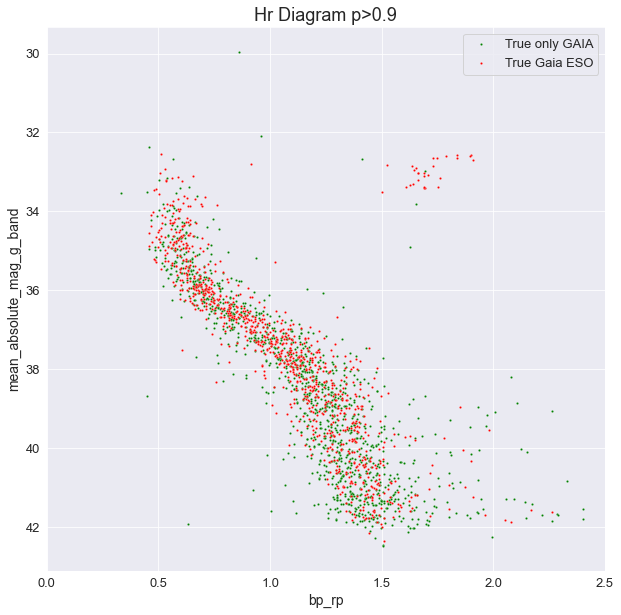

In [68]:

f, axes = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)
scatter=mean_basolute_mag_g_band(data_for_hr1[len(gaia_eso):])
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,label='True only GAIA',s=5,color='g')

scatter=mean_basolute_mag_g_band(data_for_hr1[:len(gaia_eso)])
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,label='True Gaia ESO',s=5,color='r')

scatter=mean_basolute_mag_g_band(data_for_hr2)
#sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,label='False',s=15,alpha=0.7)

axes.set_xlim(0,2.5)
axes.invert_yaxis()
plt.legend()
axes.set_title("Hr Diagram p>0.9")
plt.show()

# Plot using what was trained on all of the data.

In [46]:
data_for_hr1_full=df_diagram_full[df_diagram_full['prob']>=0.9]
data_for_hr2_full=df_diagram_full[df_diagram_full['prob']<0.9]

/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/3235324061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_gaia['mean_absolute_mag_g_band']=selection_gaia['phot_g_mean_mag']+5*np.log10(selection_gaia['rgeo'])+5
/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/3235324061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_gaia['mean_absolute_mag_g_band']=selection_gaia['phot_g_mean_mag']+5*np.log10(selection_gaia['rgeo'])+5
/var/folders/tm/gnjj0w_d6vj9x6

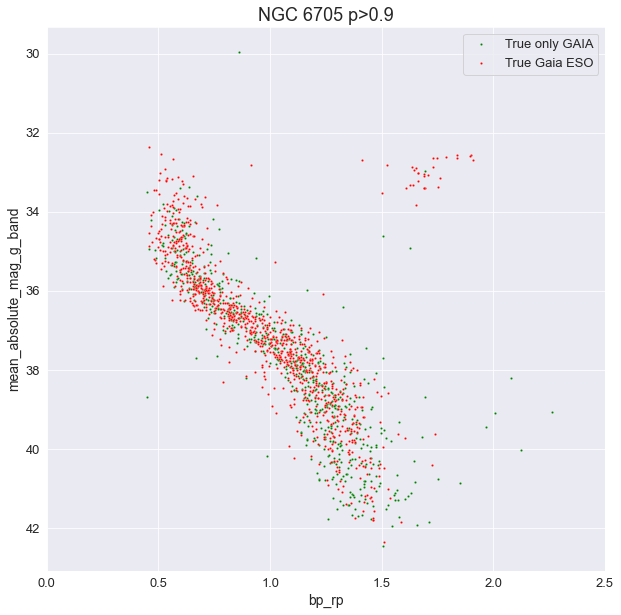

In [48]:
f, axes = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)
scatter=mean_basolute_mag_g_band(data_for_hr1_full[len(gaia_eso):])
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,s=5,label='True only GAIA',color='g')

scatter=mean_basolute_mag_g_band(data_for_hr1_full[:len(gaia_eso)])
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,s=5,label='True Gaia ESO',color='r')

scatter=mean_basolute_mag_g_band(data_for_hr2_full)
#sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,label='False',s=5,alpha=0.7)

axes.set_xlim(0,2.5)
axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
plt.show()

See jackson paper for comparison. Using the three component one with all of the data is good.

# Classified by both:

In [69]:
df_diagram_full['prob_other']=df_diagram['prob']

In [73]:
data_for_hr1=df_diagram_full[df_diagram_full['prob']>=0.9]
data_for_hr1both=data_for_hr1[data_for_hr1['prob_other']>=0.9]
data_for_hr2=df_diagram_full[df_diagram_full['prob_other']>=0.9]
data_for_hr2=data_for_hr2[data_for_hr2['prob']<0.9]

/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/3235324061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_gaia['mean_absolute_mag_g_band']=selection_gaia['phot_g_mean_mag']+5*np.log10(selection_gaia['rgeo'])+5
/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_2031/3235324061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_gaia['mean_absolute_mag_g_band']=selection_gaia['phot_g_mean_mag']+5*np.log10(selection_gaia['rgeo'])+5


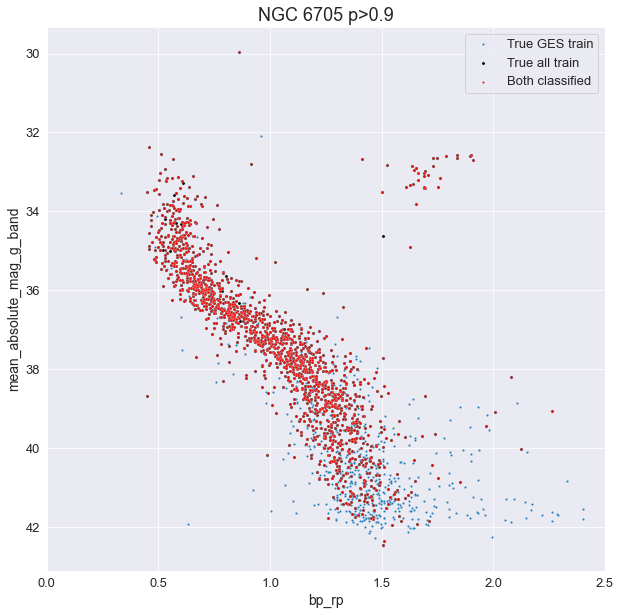

In [77]:
f, axes = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)




scatter=mean_basolute_mag_g_band(data_for_hr2)
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,label='True GES train',s=5)

scatter=mean_basolute_mag_g_band(data_for_hr1)
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,s=10,label='True all train',color='black')



scatter=mean_basolute_mag_g_band(data_for_hr1both)
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,s=5,label='Both classified',color='r')


axes.set_xlim(0,2.5)
axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
plt.show()

# Posterior.
https://arxiv.org/pdf/1405.4895.pdf

Plotting the parameters vs the expected values.

# Using Variational Autoencoders to reduce the dimensions of the HR diagram

In [79]:
data_for_colour_pre=mean_basolute_mag_g_band(df_diagram_full)
data_for_colour=data_for_colour_pre[['bp_rp','mean_absolute_mag_g_band','prob','ra','dec','parallax','VRAD','pmra','pmdec','phot_g_mean_mag','bp_g','g_rp','rgeo']]

In [80]:
os.chdir('../cluster_files')

In [81]:
data_for_colour.to_csv('vae_data.csv')

# For now this is done in the vae_cluster file but can be brought back here after
' ----------------------------------------------------------------------------------

# eventually will have to include dropna values

In [ ]:
data_for_colour=data_for_colour.dropna()

In [ ]:
data_for_colour

,bp_rp,mean_absolute_mag_g_band,prob,ra,dec,parallax,VRAD,pmra,pmdec,phot_g_mean_mag,bp_g,g_rp,rgeo
0,1.330919,38.262669,2.272232e-105,282.565031,-6.258065,0.558562,30.64,0.776237,-6.756839,16.820326,0.590866,0.740053,1942.98157
1,1.458172,41.751920,1.560951e-97,282.583418,-6.192254,0.376980,105.47,-1.612175,-4.640347,17.810553,0.413675,1.044496,6141.48389
2,1.252724,39.021232,6.492006e-05,282.592885,-6.329504,0.375033,39.07,-2.393408,-4.043109,16.887486,0.575531,0.677193,2671.46338
3,1.342695,37.603998,1.407040e-289,282.596724,-6.241452,0.523459,-43.21,-3.040533,-0.931751,16.224398,0.585712,0.756983,1887.64343
4,1.233818,37.747092,5.012303e-49,282.596739,-6.257442,0.395225,-5.76,-0.711199,-4.404408,15.882403,0.529069,0.704749,2360.14062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25777,1.685307,41.518770,1.672779e-29,282.788470,-6.007469,0.030766,0.00,-2.850967,-5.665195,17.267374,0.790930,0.894377,7084.01074
25778,1.605724,38.143671,0.000000e+00,282.780248,-6.007047,0.449862,0.00,1.577184,3.119071,16.531607,0.720057,0.885668,2100.93555
25779,2.963137,41.491576,3.309349e-07,282.775456,-6.005157,0.002803,0.00,-1.806624,-4.939151,17.039620,1.733685,1.229452,7769.46533
25780,1.505640,40.704406,2.134537e-18,282.703295,-6.011748,0.209325,0.00,-3.147602,-4.699169,17.225449,0.667429,0.838211,4963.53955


In [ ]:
from sklearn.preprocessing import  MinMaxScaler
import torch



In [ ]:
scaler=MinMaxScaler()


In [ ]:
colour_mag=scaler.fit_transform(data_for_colour[['bp_rp','mean_absolute_mag_g_band']].values)
#colour_mag=scaler.fit_transform(data_for_colour[['bp_rp','phot_g_mean_mag','rgeo','bp_g','g_rp']].values)


# Try with just gaia eso data for now

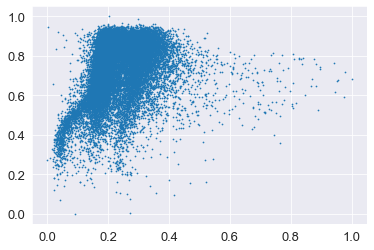

In [ ]:
plt.scatter(colour_mag.transpose()[0],colour_mag.transpose()[1],s=0.5)


# Train the Variational Autoencoders

In [ ]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import Adam
from torch.utils.data import DataLoader


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Latent Parameters

In [ ]:
batch_size = 1003 #617 #factor for 1090
lr = 1e-3
epochs = 100

zdim=2

In [ ]:
vae_spec=DataLoader(torch.tensor(colour_mag).float(),batch_size=batch_size) 

In [ ]:
zdim=2

In [ ]:
encoder = Encoder(input_dim=colour_mag.shape[1], hidden_dims=[500,20], z_dim=zdim,dropout=0.2)
decoder = Decoder(output_dim=colour_mag.shape[1], hidden_dims = [20,500], z_dim=zdim,dropout=0.2)
model = VAE(Encoder=encoder, Decoder=decoder).to(DEVICE)
optimizer=Adam(model.parameters(),lr=lr)

In [ ]:
print("Start training VAE...")
model.train()
model_train(vae_spec=vae_spec,model=model,optimizer=optimizer,loss_function=loss_function,epochs=epochs,batch_size=batch_size)


Start training VAE...


RuntimeError: shape '[1003, 2]' is invalid for input of size 1006

In [ ]:
model.eval()
x_recon=model(torch.tensor(colour_mag).float())[0].detach().numpy()

In [ ]:
z_mean=model(torch.tensor(colour_mag).float())[1].detach().numpy()
z_log_var=model(torch.tensor(colour_mag).float())[2].detach().numpy()

z=model(torch.tensor(colour_mag).float())[3].detach().numpy()

# This z is only a sample of $p(z|x)$, the posterior encoder of the latent space given the observations $x$, i.e color_mag. So we need to MCMC on this to get samples.

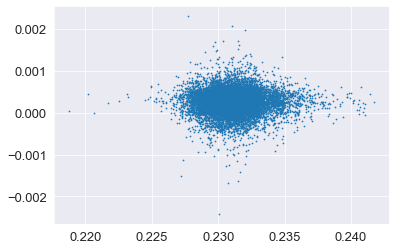

In [ ]:
plt.scatter(model(torch.tensor(colour_mag).float())[0].detach().numpy().transpose()[0],model(torch.tensor(colour_mag).float())[1].detach().numpy().transpose()[0],s=0.5)


In [ ]:
data_for_colour[['z_mean1','z_mean2']]=z_mean
data_for_colour[['z1','z2']]=z


<AxesSubplot:xlabel='z_mean1', ylabel='z_mean2'>

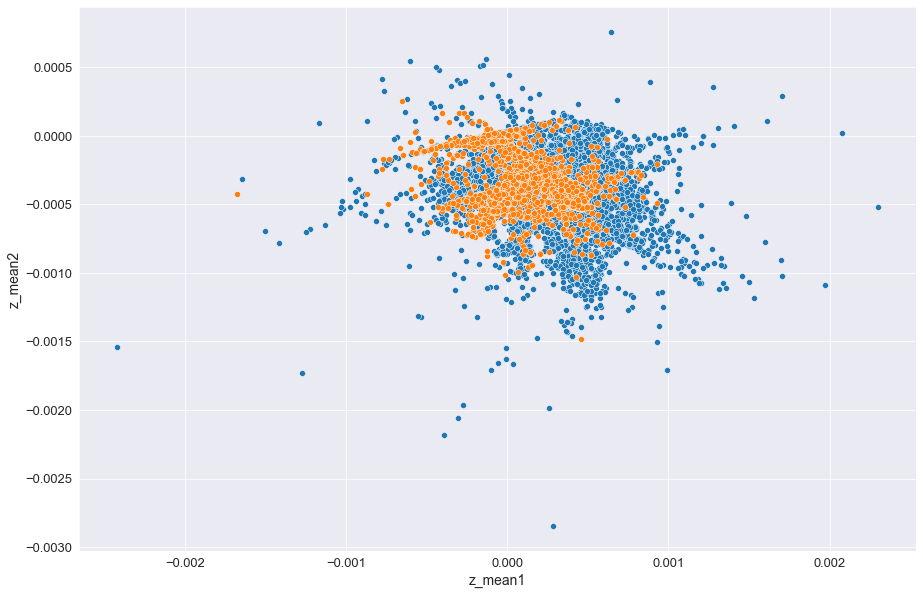

In [ ]:
plt.figure(figsize=(15,10))
sn.scatterplot(data=data_for_colour[data_for_colour['prob']<=0.9],x='z_mean1',y='z_mean2')
sn.scatterplot(data=data_for_colour[data_for_colour['prob']>0.9],x='z_mean1',y='z_mean2')

<AxesSubplot:xlabel='z1', ylabel='z2'>

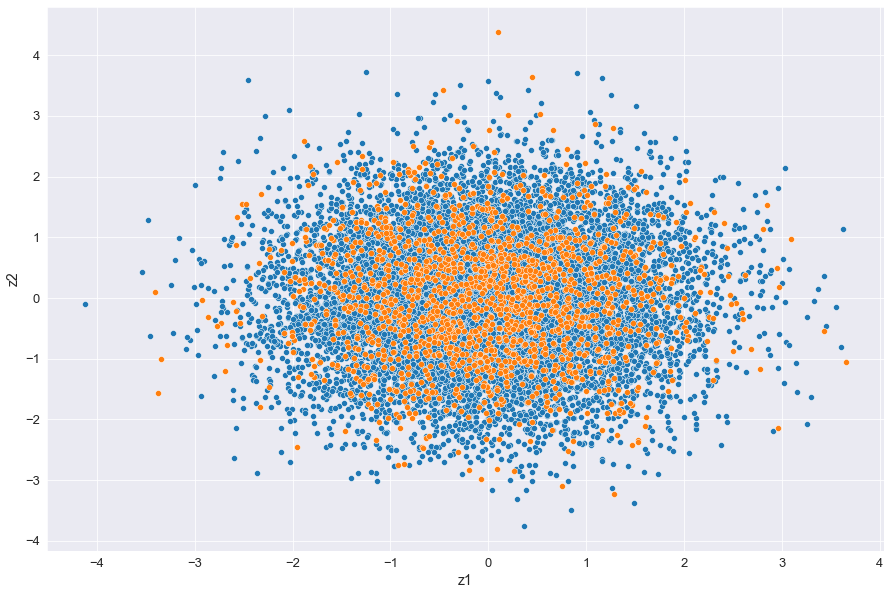

In [ ]:
plt.figure(figsize=(15,10))
sn.scatterplot(data=data_for_colour[data_for_colour['prob']<=0.9],x='z1',y='z2')
sn.scatterplot(data=data_for_colour[data_for_colour['prob']>0.9],x='z1',y='z2')

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0).fit(data_for_colour[['z_mean1','z_mean2']].values)

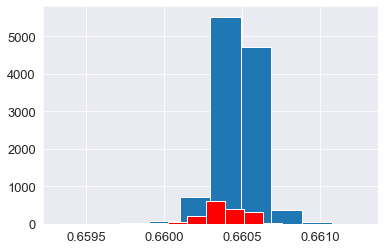

In [ ]:
plt.hist(gm.predict_proba(data_for_colour[data_for_colour['prob']<=0.9][['z_mean1','z_mean2']].values).transpose()[1])
plt.hist(gm.predict_proba(data_for_colour[data_for_colour['prob']>0.9][['z_mean1','z_mean2']].values).transpose()[1],color='r')
plt.show()

data_for_colour['prob2']=gm.predict_proba(data_for_colour[['z_mean1','z_mean2']].values).transpose()[1]

In [ ]:
data_for_hr1_full=data_for_colour[data_for_colour['prob2']>=0.99]
data_for_hr2_full=data_for_colour[data_for_colour['prob2']<0.8]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


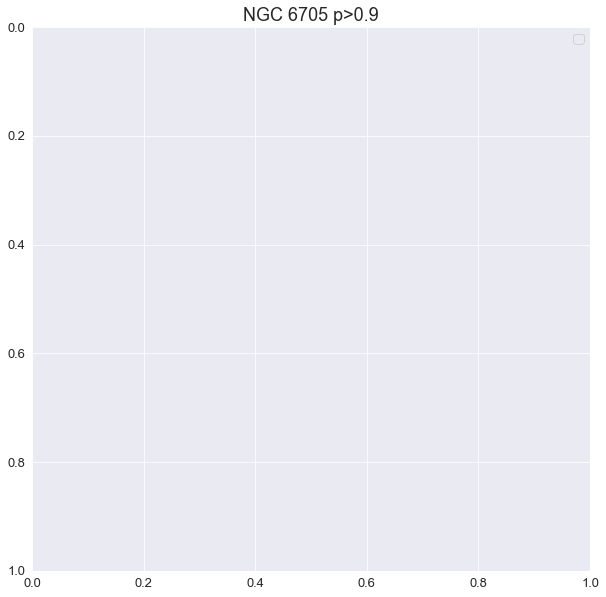

In [ ]:
f, axes = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)
scatter=mean_basolute_mag_g_band(data_for_hr1_full[len(gaia_eso):])
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,s=20,label='True only GAIA',color='g')

scatter=mean_basolute_mag_g_band(data_for_hr1_full[:len(gaia_eso)])
sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,s=20,label='True Gaia ESO',color='r')

scatter=mean_basolute_mag_g_band(data_for_hr2_full)
#sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],ax=axes,label='False',s=15,alpha=0.7)

#axes.set_xlim(0,2.5)
axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
plt.show()

# Check colour mag for the colours 

# PCA